Given two radial measures $f^+$ and $f^-$ given by
$$
r(x,y)=\sqrt{x^2+y^2}\\
f^{+}(x,y)=F(r)=8(1-3r)\quad 0\leq r\le 1/3 \\
f^{+}(x,y)=F(r)=3r-2   \quad 2/3\leq r\le 1 \\
$$
we solve the p-Laplacian equation 
$$
\nabla \cdot ( |\nabla u|^{p-2} \nabla u^*(x) )= f^{+}(x)-f^{-}(x)
$$
on the domain $\Omega=x^2+y^2\le1$.

In this example there exist explicit formulas for the gradient of the potential $u$. Given the function 
$$
Z(r)=\frac{1}{r}\int_{0}^{r} t F(t)dt
$$
$\nabla u$ reads as
$$
\nabla u(x,y)=Z(r)^{p-1}(x/r,y/r)
$$

In [1]:
# 
# Loading stardard and dmk pyhton modules
#

# Standard tools
import sys
import numpy as np
import os
current_source_dir=os.getcwd()

# Import I/O for timedata
try:
    sys.path.append('../../../../../globals/python/timedata/')
    import timedata as td
except:
    print("Global repo non found")



# Import dmk tools
sys.path.append('../../')
import dmk_p1p0 




relative_libpath='../../../../build/python/fortran_python_interface/'
dmk_lib_path=os.path.abspath(os.path.normpath(current_source_dir+'/'+relative_libpath))
sys.path.append(dmk_lib_path)
from dmk import (Dmkcontrols,  # controls for dmk simulations)
                 Timefunctionals # information of time/algorithm evolution
                )
# Import plot tools
import matplotlib.pyplot as plt

/home/fh/srcs/dmk_solver/build/python/fortran_python_interface


In [2]:
#
# Define mesh for spatial disctetization.
# Build the "coord" and "topol" numpy arrays describing coordinate and topology of the mesh.
#
sys.path.append('../../../../../geometry/python/')
import meshtools as mt
sys.path.append('../../../preprocess/assembly/')
import example_grid

# set mesh size 

/home/fh/srcs/globals/python/timedata
/home/fh/srcs/dmk_solver/otp_solver/python/examples/plaplacian
/home/fh/srcs/dmk_solver/otp_solver/preprocess/assembly
/home/fh/srcs/globals/python/timedata


In [3]:
#
# Define mesh for spatial disctetization.
# Build the "coord" and "topol" numpy arrays describing coordinate and topology of the mesh.
#
sys.path.append('../../../../../geometry/python/')
import meshtools as mt
sys.path.append('../../../preprocess/assembly/')
import example_grid

# set mesh size 
ndiv=4
length=1.0/float(ndiv)
nref=0


# set grid example
flag_grid='plaplacian_refine'
#flag_grid='rect_cnst'

# build grid using prebuild examples 
points, vertices, coord,topol,element_attributes = example_grid.example_grid(flag_grid,length)

#build properties
ncell=len(topol)
bar_cell=mt.make_bar(coord,topol).transpose()
size_cell=mt.make_size(coord,topol);
print(sum(size_cell)-np.pi*1.05**2)
mt.write_grid(coord,topol,'grid.dat')

5027
24
27
3352
19
16
1676
10
8
len_attributes 55661
-0.031176934419925306


In [3]:
#
# We create piecewise constant rapresentations of $f,f^+,f-$ and $\mu^*$,
# evaluating the function on cell centroids.
#

plapl=40

# define source and sink radial functions
test=2
if (test==1):
    def source(x,y):
        fvalue=0.0
        r=np.sqrt(x**2+y**2)
        if (r<= 1.0/3.0):values=0.0
    if (r == 0.0):
        values = 0.0
    if (r <= 1.0/3.0 ):
        values = 5*sin(3*pi*r)
    if (r > 1.0/3.0) and (r<=2.0/3.0 ):
        values = 0.0
    if (r >= 2.0/3.0 ):
        values = -sin(3*pi*r)
    return values;
            fvalue=8*(1-3*r)
        return fvalue

    def sink(x,y):
        fvalue=0.0
        r=np.sqrt(x**2+y**2)
        if ( r >=2.0/3.0) and (r<=1):
            fvalue=3*r-2
        return fvalue
    # zeta function
    def zeta_function(r):
        if ( r<1.0/3.0):
            value=8*(r/2-r**2)
        if ( r>1.0/3.0) and ( r<2.0/3.0) :
            value=8/(54*r)
        if ( r>2.0/3.0) :
            value=-r**2+r
        return value
elif (test==2):
    def source(x,y):
        fvalue=0.0
        r=np.sqrt(x**2+y**2)
        if (r<= 1.0/3.0):
            fvalue=9*np.sin(3*np.pi*x)
        return fvalue

    def sink(x,y):
        fvalue=0.0
        r=np.sqrt(x**2+y**2)
        if ( r >=2.0/3.0) and (r<=1):
            fvalue=-np.sin(3*np.pi*x)
        return fvalue
   
    # zeta function
    def zeta_function(r):
        b=5
        if (r <1e-15  ):
            value=0.0
        elif ( r<=1.0/3.0):
            value=(1.0/r*b/(3*np.pi**2)*
                   (np.sin(3*np.pi*r)-
                    3*np.pi*r*np.cos(3*np.pi*r)))
        elif ( r>1.0/3.0) and ( r<=2.0/3.0) :
            value=(1.0/r)*(b*np.pi)/(3*np.pi**2)
        elif ( r>=2.0/3.0) :
            value=(1.0/r)*1/(3*np.pi**2)*(
                b*np.pi-
                (np.sin(3*np.pi*r)-
                 3*np.pi*r*np.cos(3*np.pi*r)
                 +2*np.pi))
        elif (abs(r-1)<1e-15):
            value=0
        return value
    
"""
def source(x,y):
    if (x<1.0/2.0):
        fvalue=0.0
        if ((x >= 1.0/8.0) and (x<=3.0/8.0) and
            (y >= 1.0/4.0) and (y<=3.0/4.0) ) :
            fvalue=2.0
    else:
        fvalue=0.0
        
    return fvalue;

def sink(x,y):
    if (x>=1.0/2.0):
        fvalue=0.0
        if ((x >= 5.0/8.0) and (x<=7.0/8.0) and
            (y >= 1.0/4.0) and (y<=3.0/4.0) ) :
            fvalue=2.0
    else:
        fvalue=0.0       
    return fvalue;
"""
def local_p1(coord,points,iloc):
    return points[0]*coord[0]+points[1]*coord[1]+points[2]*coord[2]
    
def uprime(r,plapl):
    uprime=(zeta_function(r)**(1/(plapl-1)))
    return uprime 
    
# For this case there exists an explicit solutio
def optimal_gradient(x,y,plapl):
    plapl=float(extra_source)
    r=np.sqrt(x**2+y**2)
    uprime=(zeta_function(r)**(1/(plapl-1)))
    return uprime*x/r,uprime*y/r;
def norm_optimal_gradient(x,y,plapl):
    [ux,uy]=optimal_gradient(x,y,plapl)
    return np.sqrt(ux**2+uy**2)
def optimal_transport_density(x,y,plapl):
    r=np.sqrt(x**2+y**2)
    return (zeta_function(r)**((plapl-2)/(plapl-1)))

In [17]:
print(topol[0])

[10300  2434  2435]


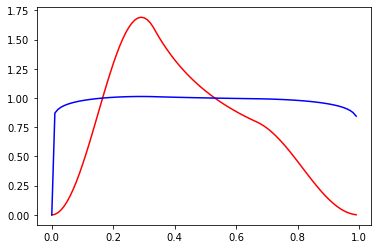

In [18]:
import matplotlib.pyplot as plt

t = np.arange(0., 1, 0.01)
zeta=np.vectorize(zeta_function)
normgrad=np.vectorize(uprime)
z  = zeta(t)
ng = normgrad(t,plapl)
plt.plot(t,z,'r',t,ng,'b')

In [4]:
# compute functions on cell centroids
source_cell=np.zeros([ncell]);
sink_cell=np.zeros([ncell]);
opttdens_cell=np.zeros([ncell])
for i in range(ncell):
    source_cell[i] = source(bar_cell[0,i],bar_cell[1,i])
    sink_cell[i]   = sink(bar_cell[0,i],bar_cell[1,i])
    opttdens_cell[i] = optimal_transport_density(
        bar_cell[0,i],bar_cell[1,i],plapl)
    
import quadpy
scheme = quadpy.t2.get_good_scheme(12)
#scheme.show()
fplus = np.vectorize(source)
fminus = np.vectorize(sink)

# compute int (f^{+}-f^-)*phi_i(x)
def barycentric_coordinate(x,y,coord_t):
    v0 = coord_t[0:2,2]   - coord_t[0:2,0]
    v1 = coord_t[0:2,1]   - coord_t[0:2,0]
    v2 = np.array((x, y)) - coord_t[0:2,0]
    
    # Compute dot products
    dot00 = np.dot(v0, v0)
    dot01 = np.dot(v0, v1)
    dot02 = np.dot(v0, v2)
    dot11 = np.dot(v1, v1)
    dot12 = np.dot(v1, v2)

    # Compute barycentric coordinates
    inv_denom = 1 / (dot00 * dot11 - dot01 * dot01)
    u = (dot11 * dot02 - dot01 * dot12) * inv_denom
    v = (dot00 * dot12 - dot01 * dot02) * inv_denom
    z = 1-u-v
    
    return np.array([u,v,z])
    
    


rhs=np.zeros(len(coord))
for icell,t in enumerate(topol):
    #print(t)
    coord_local=coord[t]
    #print('local',coord_local)
    for iloc, n in enumerate(t):
        # integrate forcing*local_basis
        integral=0
        for j,point in enumerate(scheme.points.transpose()):
            #print (j,point)
            evaluation_point=(
                point[0]*coord_local[0]+
                point[1]*coord_local[1]+
                point[2]*coord_local[2])
            #print(evaluation_point)
            x=evaluation_point[0]
            y=evaluation_point[1]
            fun=source(x,y)-sink(x,y)
            p1loc=point[iloc]
            #print(p1loc)
            integral=integral+scheme.weights[j]*fun*p1loc*size_cell[icell]
            #print(integral)
        # add contribution
        rhs[n]=rhs[n]+integral
        

print('higher quadrature', np.sum(rhs))

"""
rhs=np.zeros(len(coord))
for icell,t in enumerate(topol):
    coord_local=coord[t]
    for iloc, n in enumerate(t):
        def local_function(x,iloc):
            f=source(x[0],x[1])-sink(x[0],x[1])
            bary=barycentric_coordinate(x[0],x[1],coord_local)
            return bary[iloc]
        for j,point in enumerate(scheme.points.transpose()):
            #print (j,point)
            e_point=(
                point[0]*coord_local[0]+
                point[1]*coord_local[1]+
                point[2]*coord_local[2])
            print(local_function(e_point[0:2],iloc),point[iloc])
        #fvec = np.vectorize(local_function)
        #%rhs[n]=rhs[n] + scheme.integrate(x: fvec(x,iloc), coord_local)

print(np.sum(rhs))

"""
        
print('midpoint',np.dot(size_cell,source_cell)-np.dot(size_cell,sink_cell))
forcing_cell=source_cell-sink_cell*(np.dot(size_cell,source_cell)/np.dot(size_cell,sink_cell))


td.write_steady_timedata('forcing.dat',forcing_cell)

higher quadrature -1.214306433183765e-17
midpoint 0.0003421108184175712


In [6]:
td.write_steady_timedata('rhs.dat',rhs)

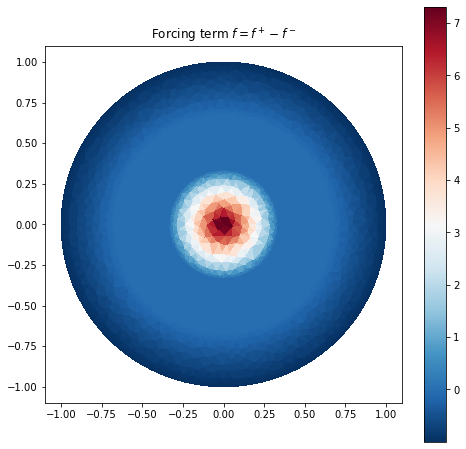

In [4]:
import matplotlib.tri as mtri
#
# plot forcing term
#
triang = mtri.Triangulation(coord.transpose()[0,:], coord.transpose()[1,:], topol)
fig1, ax1 = plt.subplots(figsize=(8, 8)); ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, forcing_cell , cmap='RdBu_r')
fig1.colorbar(tpc)
ax1.set_title('Forcing term $f=f^+-f^-$')
plt.show()


We load the controls from file. You can either change it in the file or change some controls in the next cell.

In [5]:
# init from file from file
ctrl = dmk_p1p0.init_dmkctrl(tdens_gfvar='tdens',explicit_implicit='explicit')

# The user can change any controls inside the ctrl type.
# Here we set the saving frequency (save all) and the convergence tolerance
ctrl.id_save_dat=1
ctrl.fn_tdens='tdens.dat'
ctrl.fn_pot='pot.dat'
ctrl.fn_statistics='dmk.log'


#ctrl.max_time_iterations=3
ctrl.tolerance_system_variation=1e-3

# tune linear system to speed up convergence
ctrl.outer_solver_approach='AGMG' # also AGMG if available
ctrl.outer_krylov_scheme='PCG'

# uncomment and try also this setting
ctrl.outer_solver_approach='AGMG' 
ctrl.outer_krylov_scheme='PCG'
ctrl.relax_direct=1e-8
ctrl.relax4prec=1e-8

ctrl.max_time_iterations=2000
ctrl.deltat=0.02

ctrl.deltat_control=1

In [6]:
[info,opttdens,optpot,tolop_subgrid,coord_subgrid,timefun] = dmk_p1p0.solve_MinFluxProblem(topol,coord,forcing_cell,
                                                                                           forcing_nodes=None,
                                                                                           pflux=1.8,
                                                                                        tolerance=1e-4,
                                                                                           ctrl=ctrl)
if (info==0): print('Convergence achieved')

12724 6484 3
Convergence achieved


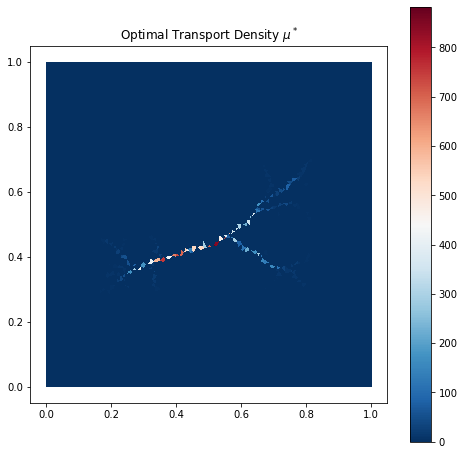

In [7]:
import matplotlib.tri as mtri
# plot forcing term
triang = mtri.Triangulation(coord.transpose()[0,:], coord.transpose()[1,:], topol)
fig1, ax1 = plt.subplots(figsize=(8, 8)); ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, opttdens , cmap='RdBu_r')
fig1.colorbar(tpc)
ax1.set_title('Optimal Transport Density $\mu^*$')
plt.show()

1624


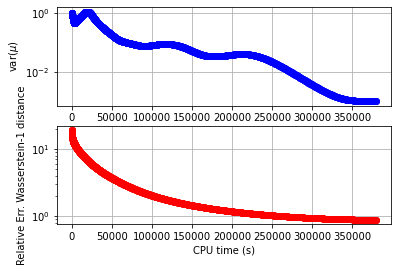

In [8]:
# plot convergence toward steady state
print(timefun.last_time_iteration)
time      = np.array(timefun.time[0:timefun.last_time_iteration]);
cpu_time  = np.array(timefun.cpu_time[0:timefun.last_time_iteration])
var_tdens = np.array(timefun.var_tdens[1:timefun.last_time_iteration])
wass1     = np.array(timefun.lyapunov[1:timefun.last_time_iteration])
errwass1=(wass1[:]-exact_wass1)/(exact_wass1)

plt.figure(1)
plt.subplot(211)
plt.yscale('log')
plt.ylabel('var($\mu$)')
plt.xlabel('CPU time (s)')
plt.grid(True)
plt.plot(cpu_time[1:], var_tdens, 'bo--')

plt.subplot(212)
plt.yscale('log')
plt.ylabel('Relative Err. Wasserstein-1 distance')
plt.xlabel('CPU time (s)')
plt.grid(True)
plt.plot(cpu_time[1:], errwass1, 'ro--')
plt.show()

In [9]:
import pyvtk

vtk = pyvtk.VtkData(\
  pyvtk.UnstructuredGrid(points=coord,
    triangle=topol
    ),
  pyvtk.CellData(pyvtk.Scalars(opttdens,name='OptTdens')),
  'artieries'
  )
vtk.tofile('OptTdens.vtk')